In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('Narcotics_Dataset.csv')

In [3]:
df.head()

,SL\nNo.,DATE OF\nSEIZURE,SEIZING\nAGENCY,QUANTITY AND\nDRUG SEIZED\n(IN KGS.),PLACE\nOF\nORIGIN,INTENDED\nDESTINAT\nION,NAME OF\nPERSONS ARRESTED,NATION-\nALITY,AGE,SEX
0,1,01.02.2019,RPF/NCB\nGuwahati,24.500 kg\nGanja,-,-,1.Sanjoy Das\n2.Juyel Das,Indian\nIndian,32\n42,M\nM
1,2,02.02.2019,"NCB Imphal along with NAB,State Police & Distr...",Destroyed illicit cultivation of Opuim spread ...,-,-,-,-,-,-
2,3,02.02.2019,BAF/NCB\nAmritsar,3.990 kg\nHeroin & 80\ngram Opium,SWA,-,-,-,-,-
3,4,02.02.2019,"Customs,\nSIIB, New\nDelhi",581.455 kg of\nDry Chatt/Khat,Ethiopia,-,1.Ahmed Hassan,Somalian,30,M
4,5,04.02.2019,"NCB Imphal along with NAB, Manipur Rifles,Stat...",Destroyed illicit cultivation of Opuim spread ...,-,-,-,-,-,-


In [4]:
df.shape

(210, 10)

In [12]:
df.isna().sum()

SL\nNo.                                 164
DATE OF\nSEIZURE                        165
SEIZING\nAGENCY                         162
QUANTITY AND\nDRUG SEIZED\n(IN KGS.)    161
PLACE\nOF\nORIGIN                       167
INTENDED\nDESTINAT\nION                 167
NAME OF\nPERSONS ARRESTED               140
NATION-\nALITY                          140
AGE                                     140
SEX                                     140
dtype: int64

In [64]:
df.columns

Index(['SL\nNo.', 'DATE OF\nSEIZURE', 'SEIZING\nAGENCY',
       'QUANTITY AND\nDRUG SEIZED\n(IN KGS.)', 'PLACE\nOF\nORIGIN',
       'INTENDED\nDESTINAT\nION', 'NAME OF\nPERSONS ARRESTED',
       'NATION-\nALITY', 'AGE', 'SEX'],
      dtype='object')

In [23]:
df.dropna(subset=['DATE OF\nSEIZURE'],inplace=True)

In [25]:
df.isna().sum()

SL\nNo.                                 0
DATE OF\nSEIZURE                        0
SEIZING\nAGENCY                         0
QUANTITY AND\nDRUG SEIZED\n(IN KGS.)    0
PLACE\nOF\nORIGIN                       2
INTENDED\nDESTINAT\nION                 2
NAME OF\nPERSONS ARRESTED               0
NATION-\nALITY                          0
AGE                                     0
SEX                                     0
dtype: int64

In [40]:
n_df=df[['DATE OF\nSEIZURE','AGE']]

In [41]:
n_df['AGE'].unique()

array(['32\n42', '-', '30', '-\n-', '20\n25', '50', '-\n-\n-\n-',
       '30\n19', '24\n31', '21\n26', '46', '37', '36\n34', '38', '35',
       '27', '44\n35'], dtype=object)

In [42]:
n_df['AGE'].replace({
    '32\n42':37, '20\n25':22,'30\n19':25, '24\n31':27, '21\n26':24, '36\n34':35,'44\n35':40
},inplace=True)

C:\Users\Sonal\Anaconda3\lib\site-packages\pandas\core\series.py:4582: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [45]:
n_df['AGE']=pd.to_numeric(n_df['AGE'],errors='coerce')

C:\Users\Sonal\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [49]:
n_df['AGE'].fillna(n_df['AGE'].mean(),inplace=True)

C:\Users\Sonal\Anaconda3\lib\site-packages\pandas\core\series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [50]:
n_df.isna().sum()

DATE OF\nSEIZURE    0
AGE                 0
dtype: int64

In [51]:
plt.figure(figsize=(8,8))
n_df.sort_values(by=['AGE'],ascending=True)
n_df.head()

,DATE OF\nSEIZURE,AGE
0,01.02.2019,37.000000
1,02.02.2019,32.944444
2,02.02.2019,32.944444
3,02.02.2019,30.000000
4,04.02.2019,32.944444


<Figure size 576x576 with 0 Axes>

Text(0.5, 1.0, 'Time vs Age')

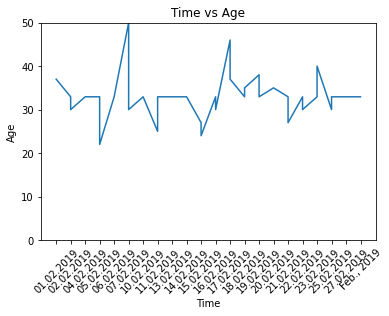

In [54]:
plt.plot(n_df['DATE OF\nSEIZURE'],n_df['AGE'])
plt.xlabel('Time')
plt.ylabel('Age')
plt.xticks(rotation=45)
plt.ylim(0,50)
plt.title('Time vs Age')

Text(0.5, 1.0, 'Time vs Age')

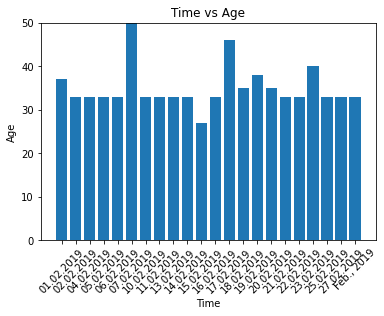

In [55]:
plt.bar(n_df['DATE OF\nSEIZURE'],n_df['AGE'])
plt.xlabel('Time')
plt.ylabel('Age')
plt.xticks(rotation=45)
plt.ylim(0,50)
plt.title('Time vs Age')

In [56]:
df['SEX'].unique()

array(['M\nM', '-', 'M', 'F', 'M\nM\nM\nM'], dtype=object)

In [57]:
df['SEX'].replace({
    'M\nM':'M', '-':'N', 'M\nM\nM\nM':'M'
},inplace=True)

In [58]:
df['SEX'].unique()

array(['M', 'N', 'F'], dtype=object)

(array([22.,  0.,  0.,  0.,  0., 20.,  0.,  0.,  0.,  3.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

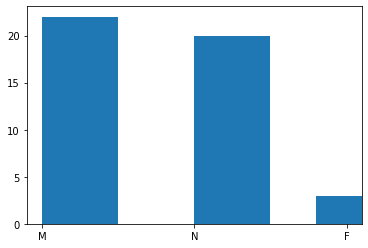

In [63]:
plt.hist(df['SEX'],width=0.5)

In [67]:
df.rename(columns={
    'SL\nNo.':'id', 'DATE OF\nSEIZURE':'date_of_seizure', 'SEIZING\nAGENCY':'agency',
       'QUANTITY AND\nDRUG SEIZED\n(IN KGS.)':'quantity', 'PLACE\nOF\nORIGIN':'place',
       'INTENDED\nDESTINAT\nION':'Destination', 'NAME OF\nPERSONS ARRESTED':'Name',
       'NATION-\nALITY':'Country', 'AGE':'age', 'SEX':'sex'
},inplace=True)

In [68]:
df.columns

Index(['id', 'date_of_seizure', 'agency', 'quantity', 'place', 'Destination',
       'Name', 'Country', 'age', 'sex'],
      dtype='object')

In [70]:
df['Country'].unique()

array(['Indian\nIndian', '-', 'Somalian', 'Indian',
       'Indian\nIndian\nIndian\nIndian', 'Venezuela', 'Nepalese'],
      dtype=object)

In [72]:
df['Country'].replace({
    'Indian\nIndian':'Indian', '-':'Indian',
    'Indian\nIndian\nIndian\nIndian':'Indian',
},inplace=True)

In [73]:
df['Country'].value_counts()

Indian       42
Nepalese      1
Venezuela     1
Somalian      1
Name: Country, dtype: int64

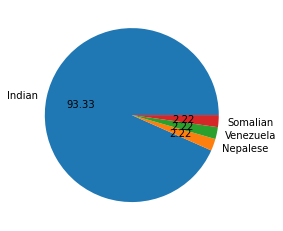

In [80]:
plt.pie(df['Country'].value_counts(),labels=df['Country'].value_counts().keys(),autopct='%.2f')
plt.show()

In [88]:
df['age']=n_df['AGE']
df['age']=pd.to_numeric(df['age'],errors='coerce')

In [89]:
df['age'].unique

<bound method Series.unique of 0     37.000000
1     32.944444
2     32.944444
3     30.000000
4     32.944444
5     32.944444
6     32.944444
7     32.944444
8     32.944444
9     22.000000
10    32.944444
11    32.944444
12    32.944444
13    50.000000
14    32.944444
15    30.000000
16    32.944444
17    25.000000
18    32.944444
19    32.944444
20    32.944444
21    27.000000
23    24.000000
24    32.944444
25    30.000000
32    46.000000
33    37.000000
34    32.944444
35    35.000000
36    38.000000
37    32.944444
38    32.944444
39    32.944444
40    35.000000
41    32.944444
46    27.000000
47    32.944444
48    32.944444
49    30.000000
50    32.944444
51    40.000000
52    30.000000
53    32.944444
54    32.944444
55    32.944444
Name: age, dtype: float64>

In [90]:
df['AGE_range']=pd.cut(df['age'],bins=[0,20,25,60],labels=['young','middle_aged','senior'])

In [91]:
df['AGE_range']

0          senior
1          senior
2          senior
3          senior
4          senior
5          senior
6          senior
7          senior
8          senior
9     middle_aged
10         senior
11         senior
12         senior
13         senior
14         senior
15         senior
16         senior
17    middle_aged
18         senior
19         senior
20         senior
21         senior
23    middle_aged
24         senior
25         senior
32         senior
33         senior
34         senior
35         senior
36         senior
37         senior
38         senior
39         senior
40         senior
41         senior
46         senior
47         senior
48         senior
49         senior
50         senior
51         senior
52         senior
53         senior
54         senior
55         senior
Name: AGE_range, dtype: category
Categories (3, object): ['young' < 'middle_aged' < 'senior']

In [93]:
df['Destination'].isna().sum()

2

In [94]:
df['Destination'].unique()

array(['-', 'Doha,\nQatar', 'South\nAfrica', nan, 'USA'], dtype=object)

In [95]:
df['Destination'].replace(
{
    '-':'India', 'Doha,\nQatar':'Doha_Qatar', 'South\nAfrica':'SA', np.NaN:'India' ,
},inplace=True)

In [96]:
df['Destination'].unique()

array(['India', 'Doha_Qatar', 'SA', 'USA'], dtype=object)

In [97]:
df['Destination'].value_counts()

India         42
USA            1
SA             1
Doha_Qatar     1
Name: Destination, dtype: int64

<AxesSubplot:>

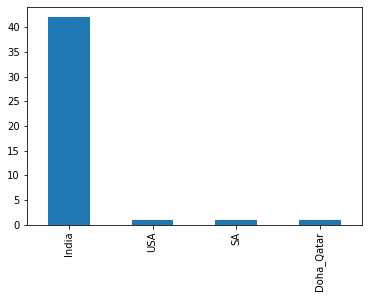

In [103]:
df['Destination'].value_counts().plot(kind='bar')

(array([ 2.,  3.,  5., 27.,  2.,  3.,  1.,  0.,  1.,  1.]),
 array([22. , 24.8, 27.6, 30.4, 33.2, 36. , 38.8, 41.6, 44.4, 47.2, 50. ]),
 <BarContainer object of 10 artists>)

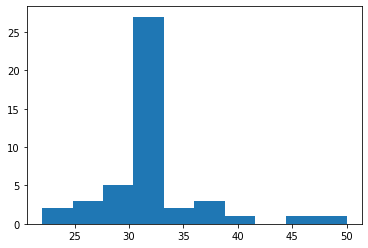

In [106]:
plt.hist(df['age'])

<AxesSubplot:>

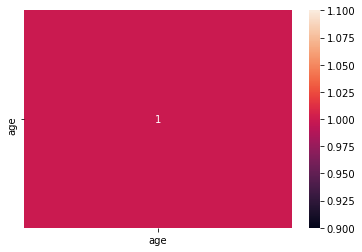

In [108]:
sns.heatmap(df.corr(),annot=True)

In [109]:
df.head()

,id,date_of_seizure,agency,quantity,place,Destination,Name,Country,age,sex,AGE_range
0,1,01.02.2019,RPF/NCB\nGuwahati,24.500 kg\nGanja,-,India,1.Sanjoy Das\n2.Juyel Das,Indian,37.000000,M,senior
1,2,02.02.2019,"NCB Imphal along with NAB,State Police & Distr...",Destroyed illicit cultivation of Opuim spread ...,-,India,-,Indian,32.944444,N,senior
2,3,02.02.2019,BAF/NCB\nAmritsar,3.990 kg\nHeroin & 80\ngram Opium,SWA,India,-,Indian,32.944444,N,senior
3,4,02.02.2019,"Customs,\nSIIB, New\nDelhi",581.455 kg of\nDry Chatt/Khat,Ethiopia,India,1.Ahmed Hassan,Somalian,30.000000,M,senior
4,5,04.02.2019,"NCB Imphal along with NAB, Manipur Rifles,Stat...",Destroyed illicit cultivation of Opuim spread ...,-,India,-,Indian,32.944444,N,senior


In [116]:
df.at[3,'agency']

'Customs,\nSIIB, New\nDelhi'